## Load and preprocess data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('./ml-32m/movies.csv')
ratings = pd.read_csv('./ml-32m/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [5]:
df = pd.merge(ratings,movies,on='movieId')
print(movies.shape)
print(ratings.shape)
print(df.shape)

(87585, 3)
(32000204, 4)
(32000204, 6)


In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [7]:
# Check for missing values
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [8]:
df.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


## Step 2: Explore basic statistics

### Unique values

In [9]:
num_unique_users = df['userId'].unique()
num_unique_movies = df['movieId'].unique()
num_ratings = df.shape[0]

print(f"Number of unique users: {num_unique_users}")
print(f"Number of unique movies: {num_unique_movies}")
print(f"Total number of ratings: {num_ratings}")

Number of unique users: [     1      2      3 ... 200946 200947 200948]
Number of unique movies: [    17     25     29 ... 175771 157917 274343]
Total number of ratings: 32000204


## Step 3: Visualizing data

### 1. Distribution of Ratings

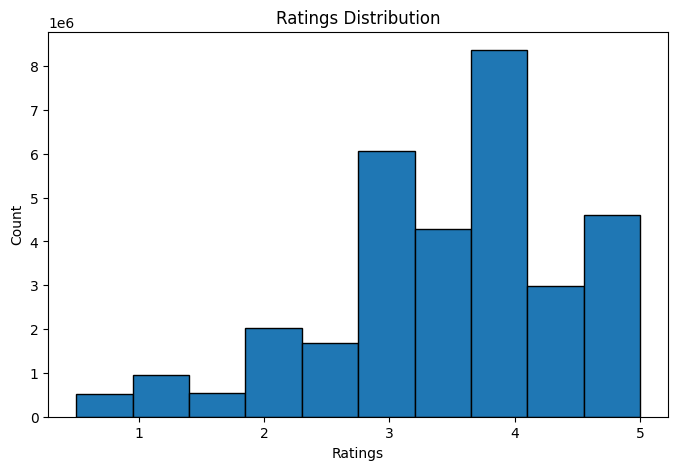

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['rating'],bins=10,edgecolor="black")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Ratings Distribution")
plt.show()

### 2. Most rated movies

In [11]:
top_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
top_rated_movies

title
Shawshank Redemption, The (1994)                             102929
Forrest Gump (1994)                                          100296
Pulp Fiction (1994)                                           98409
Matrix, The (1999)                                            93808
Silence of the Lambs, The (1991)                              90330
Star Wars: Episode IV - A New Hope (1977)                     85010
Fight Club (1999)                                             77332
Jurassic Park (1993)                                          75233
Schindler's List (1993)                                       73849
Lord of the Rings: The Fellowship of the Ring, The (2001)     73122
Name: rating, dtype: int64

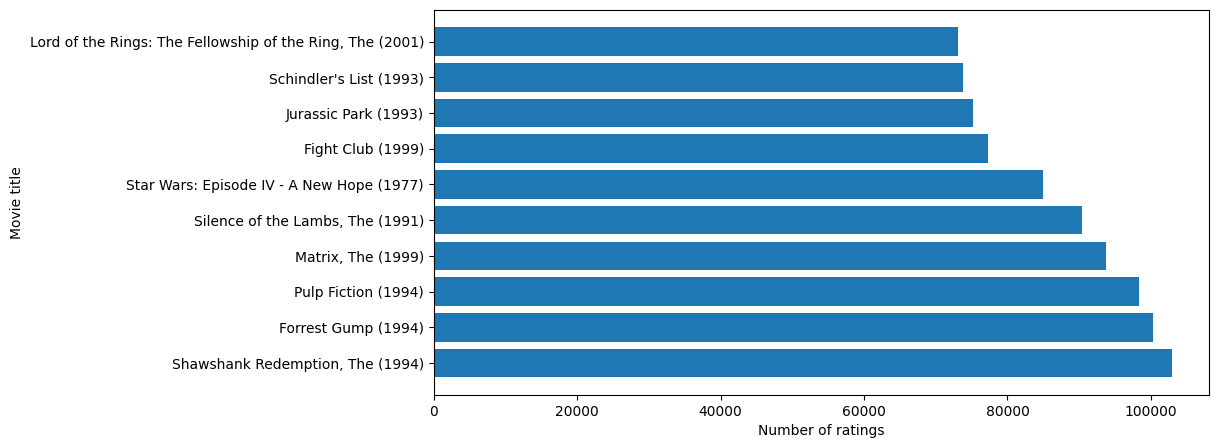

In [12]:
plt.figure(figsize=(10,5))
plt.barh(top_rated_movies.index, top_rated_movies.values)
plt.xlabel('Number of ratings')
plt.ylabel('Movie title')
# plt.gca().invert_yaxis()
plt.show()

### 3. Highest rated movies (with minimum 50 ratings)

In [18]:
# get average and count ratings
movie_avg_rating = df.groupby('title').agg({'rating': ['mean','count']})
# print(movie_avg_rating)
movie_avg_rating.columns = ['avg_rating', 'rating_count']
# compare number of ratings (>= 50)
highest_rated_movies = movie_avg_rating[movie_avg_rating['rating_count'] >= 50].sort_values(by='avg_rating', ascending=False).head(10)
print('Highest rated movies',highest_rated_movies)

Highest rated movies                                   avg_rating  rating_count
title                                                     
Planet Earth II (2016)              4.446830          1956
Planet Earth (2006)                 4.444369          2948
Band of Brothers (2001)             4.426539          2811
Shawshank Redemption, The (1994)    4.404614        102929
Cosmos                              4.330081           615
Godfather, The (1972)               4.317030         66440
Parasite (2019)                     4.312254         11670
Blue Planet II (2017)               4.300086          1163
Twin Peaks (1989)                   4.298684          1140
Twelve Angry Men (1954)             4.286192           449


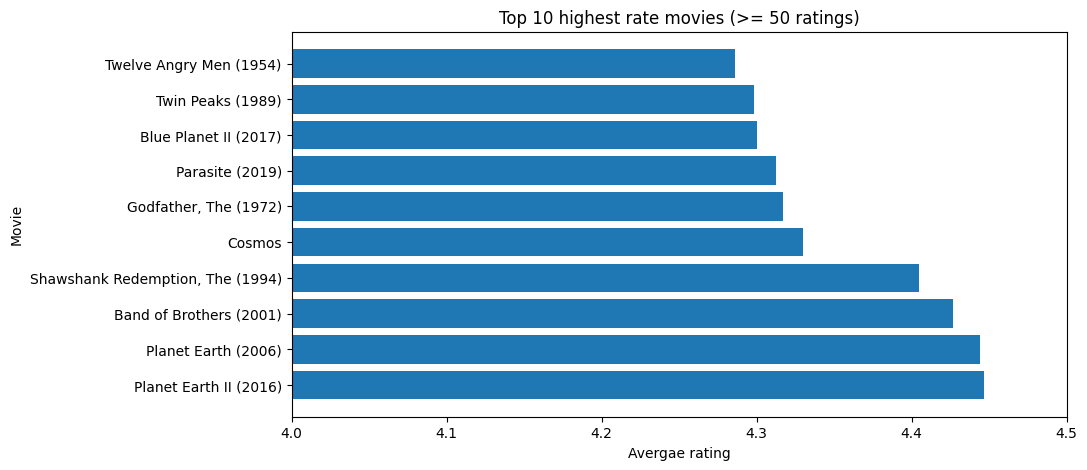

In [21]:
plt.figure(figsize=(10,5))
plt.barh(highest_rated_movies.index, highest_rated_movies['avg_rating'])
plt.title('Top 10 highest rate movies (>= 50 ratings)')
plt.xlim(4,4.5) # Zoom into high ratings
plt.xlabel('Avergae rating')
plt.ylabel('Movie')
plt.show()

### 4. Genre popularity

In [27]:
# exrtract and plit genres
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

In [30]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),[Comedy]


In [75]:
# Count each genre's appearances
# [sublist for sublist in movies2['genres']]

In [74]:
# Flatten list of lists
# [genre for sublist in movies['genres'] for genre in sublist]

In [76]:
from collections import Counter
genre_counts = Counter([genre for sublist in movies['genres'] for genre in sublist])
genre_counts

Counter({'Drama': 34175,
         'Comedy': 23124,
         'Thriller': 11823,
         'Romance': 10369,
         'Action': 9668,
         'Documentary': 9363,
         'Horror': 8654,
         '(no genres listed)': 7080,
         'Crime': 6976,
         'Adventure': 5402,
         'Sci-Fi': 4907,
         'Animation': 4617,
         'Children': 4520,
         'Mystery': 4013,
         'Fantasy': 3851,
         'War': 2325,
         'Western': 1696,
         'Musical': 1059,
         'Film-Noir': 353,
         'IMAX': 195})

In [89]:
# Convert to dataframe
# genre_counts.items()
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count',ascending=False)
genre_df

,Genre,Count
6,Drama,34175
3,Comedy,23124
9,Thriller,11823
5,Romance,10369
7,Action,9668
14,Documentary,9363
10,Horror,8654
19,(no genres listed),7080
8,Crime,6976
0,Adventure,5402


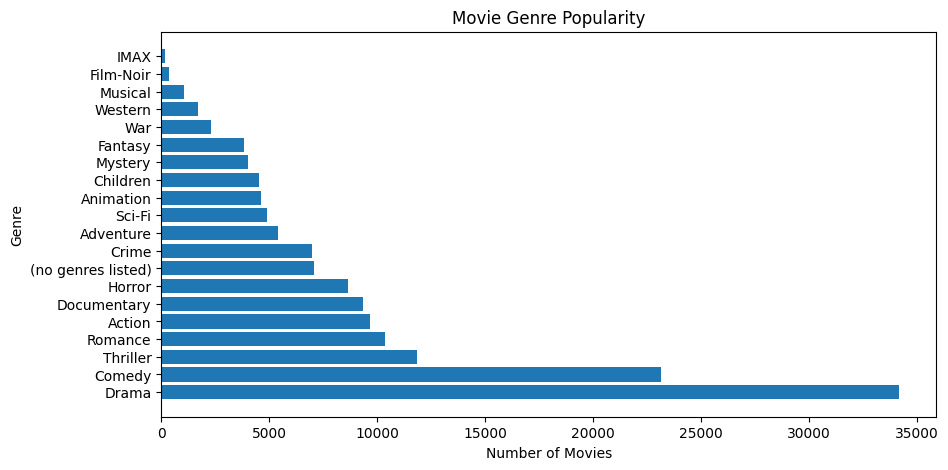

In [124]:
# Visualize
plt.figure(figsize=(10,5))
plt.barh(genre_df['Genre'],genre_df['Count'])
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Movie Genre Popularity")
plt.show()